## CLASSIFY THE QUALITY OF WINE

Import required  Libraries

In [1]:
%matplotlib inline
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

Read the Data
Downloaded from https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [2]:
df = pd.read_csv('winequality/winequality-white.csv',sep=';',quotechar='"')

In [3]:
print (df.shape)

(4898, 12)


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

So, Totally there are twelve columns / Features in the data set. The **quality** feature is our intrest as we need to predcit the quality of the wine.Lets Check the Values for the **Quality** feature

In [5]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

**Analysis:** The max value is 9 and the minimum value is 3. The values 0,1,2 are missing

In [6]:
df['quality'].describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [7]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

Most of the data is with quality 6 and then followed by 5 and 7

### Solve as Classification Problem:
Lets classify the data set as boolean Type - HighQuality , Non-HighQuality
Lets assume quality feature value greater than or equal to 6 is of High Quality wine

In [8]:
def isHighQuality(quality):
    if quality >= 6:
        return 1
    else:
        return 0

In [9]:
df['tasty'] = df['quality'].apply(isHighQuality)

Check if a new column **tasty** represnting a binary data of our highqaulity is getting added 

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'tasty'],
      dtype='object')

In [11]:
df['tasty'].value_counts()

1    3258
0    1640
Name: tasty, dtype: int64

In [12]:
target = df['tasty']
data = df.drop(['tasty','quality'],axis=1)
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

** Split Training and Testing set **

In [13]:
data_train, data_test, target_train, target_test = train_test_split(data,target,test_size = 0.33,random_state=123)

In [14]:
[subset.shape for subset in [data_train,data_test,target_train,target_test]]

[(3281, 11), (1617, 11), (3281,), (1617,)]

Just the Testing and Training Size

## Training our Classifiers with Decision Trees

#### Simple Tree

In [15]:
simpleTree = DecisionTreeClassifier(max_depth=10)
simpleTree.fit(data_train,target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

*Evaluate:*

In [16]:
simpleTreePerformance = precision_recall_fscore_support(target_test,simpleTree.predict(data_test))
simpleTreePerformance

(array([ 0.63410302,  0.84155598]),
 array([ 0.68129771,  0.8115279 ]),
 array([ 0.65685373,  0.82626921]),
 array([ 524, 1093], dtype=int64))

*Precision , Recall, Fscore ,Support*

#### GradientBoostingClassifier

In [17]:
gbmTree = GradientBoostingClassifier(max_depth=10)
gbmTree.fit(data_train,target_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [18]:
gbmTreePerformance = precision_recall_fscore_support(target_test,gbmTree.predict(data_test))
gbmTreePerformance

(array([ 0.70233463,  0.85222121]),
 array([ 0.6889313,  0.8600183]),
 array([ 0.6955684,  0.856102 ]),
 array([ 524, 1093], dtype=int64))

#### RandomForest

In [19]:
rfTree = RandomForestClassifier(max_depth=10)
rfTree.fit(data_train,target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [20]:
rfTreePerformance = precision_recall_fscore_support(target_test,rfTree.predict(data_test))
rfTreePerformance

(array([ 0.67145791,  0.82566372]),
 array([ 0.6240458 ,  0.85361391]),
 array([ 0.64688427,  0.83940621]),
 array([ 524, 1093], dtype=int64))

**Analysis:** The *precision_recall_fscore_support* computes the precision, Recall, Fscore and Support

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_true.

As seen, **Gradient Boosting Classifier** has the highest Accuracy for our current dataset. **Random Forest** has the most recall.

**Confusion Matrix:**

In [21]:
print('Confusion Matrix for simple, gradient boosted, and random forest tree classifiers:')
print('Simple Tree:\n',confusion_matrix(target_test,simpleTree.predict(data_test)),'\n')
print('Gradient Boosted:\n',confusion_matrix(target_test,gbmTree.predict(data_test)),'\n')
print('Random Forest:\n',confusion_matrix(target_test,rfTree.predict(data_test)))

Confusion Matrix for simple, gradient boosted, and random forest tree classifiers:
Simple Tree:
 [[357 167]
 [206 887]] 

Gradient Boosted:
 [[361 163]
 [153 940]] 

Random Forest:
 [[327 197]
 [160 933]]


Confusion Matrix Format is (tn, fp, fn, tp).
In Random Forest , 328 are correctly classified as negative(True Negative) and 954 are correctly classified as Positive(True Positive). Also, 196 classified as False Positive, and 139 as False Negative

**Feature Importances: **Lets get to know the important features. GBM provides a way to know the features that affect the classification. No all decision Trees support this

gbmTree.feature_importances_


In [22]:
print('Feature Importances for GBM tree\n')
for importance,feature in zip(gbmTree.feature_importances_,['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']):
    print('{}: {}'.format(feature,importance))

Feature Importances for GBM tree

fixed acidity: 0.06667752537870467
volatile acidity: 0.09286992865161374
citric acid: 0.08088630294750888
residual sugar: 0.0949636320254433
chlorides: 0.0869889521737194
free sulfur dioxide: 0.09661379599478769
total sulfur dioxide: 0.10755220455103956
density: 0.10072880892093608
pH: 0.08870497650051817
sulphates: 0.08107693189986892
alcohol: 0.10293694095585966


Inspired from https://www.leozqin.me/using-machine-learning-to-classify-the-quality-of-wine/

**Important Features:** So Alchohol and SulphurdiOxide looks to be the most important features that affects the Quality of the Wine
So lets train the decision tree with only these two features.

In [23]:
target = df['tasty']
predictors = df[['alcohol','total sulfur dioxide','free sulfur dioxide']]

In [24]:
print (predictors.shape)

(4898, 3)


In [25]:
data_train, data_test, target_train, target_test = train_test_split(predictors,target,test_size = 0.33,random_state=123)

In [26]:
simpleTree = DecisionTreeClassifier(max_depth=10)
simpleTree.fit(data_train,target_train)
simpleTreePerformance = precision_recall_fscore_support(target_test,simpleTree.predict(data_test))
simpleTreePerformance

(array([ 0.57954545,  0.77145285]),
 array([ 0.48664122,  0.83074108]),
 array([ 0.52904564,  0.8       ]),
 array([ 524, 1093], dtype=int64))

**Hmm**, Nothing significant here .Just an precision of 77 %, but a good recall of 82% which looks good compared to using all the features in the data set initailly with the same decison Tree

In [27]:
confusion_matrix(target_test,simpleTree.predict(data_test))

array([[255, 269],
       [185, 908]])

The number of items falsely classified (192) as False has come down (FN)

## K-Means Clustering

In [28]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [29]:
pred = df.drop(['tasty','quality'],axis=1)
pred.shape

(4898, 11)

In [30]:
clustervar = pred.copy()
clustervar = pd.DataFrame(preprocessing.scale(clustervar)) # Normalize the Data.
clus_train, clus_test = train_test_split(clustervar, test_size=.3, random_state=123)
clustervar.columns

RangeIndex(start=0, stop=11, step=1)

In [31]:
clustervar.columns = pred.columns
clustervar.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [32]:
k = 2
model = KMeans(n_clusters=k)
model.fit(clus_train)
meandist = (sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1))/clus_train.shape[0])
print(meandist)

2.75448585919


#### Transform the Clustered data with 'PCA' and Plot for Visualization

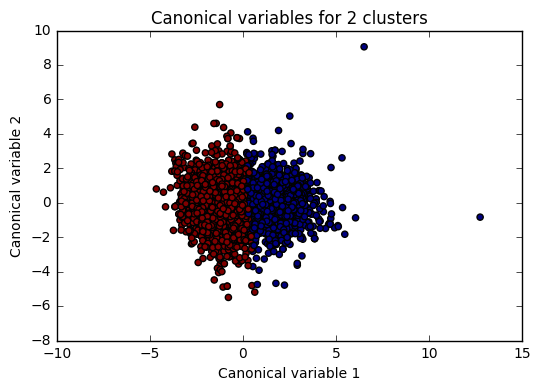

In [33]:
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:, 0], y=plot_columns[:, 1], c=model.labels_)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Canonical variables for 2 clusters')
plt.show()

### Support Vector Machines(SVM)

In [34]:
from sklearn import svm


In [35]:
data_X = df.drop(['tasty','quality'],axis=1)
data_X_copy = data_X[['alcohol','total sulfur dioxide']]
norm_X = pd.DataFrame(preprocessing.scale(data_X_copy)) # Normalize the Data.
data_train, data_test, target_train, target_test = train_test_split(norm_X,target,test_size = 0.33,random_state=123)

In [50]:
clf = svm.SVC(kernel='rbf', gamma=0.7, C=2)
data_train.columns = norm_X.columns
clf.fit(data_train, target_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
clf.predict(data_test)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

#### Todo: 
Plotting the SVM

In [52]:
y=target_train.values
X=data_train.values
print(X.shape)



(3281, 2)


In [53]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    print ('Shape of xlinspace is {}'.format(x.shape))
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    print ('Shape of X is {}'.format(X.shape))
    print ('Shape of Y is {}'.format(Y.shape))
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    print ('Shape of xy is {}'.format(xy.shape))
    P = model.decision_function(xy).reshape(X.shape)
    print ('Shape of P is {}'.format(P.shape))
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Shape of xlinspace is (30,)
Shape of X is (30, 30)
Shape of Y is (30, 30)
Shape of xy is (900, 2)
Shape of P is (30, 30)


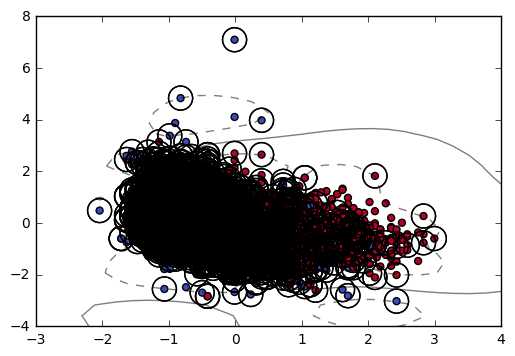

In [54]:
plt.scatter(X[:,0], X[:,1], c=y, s=25,cmap=plt.cm.coolwarm)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

Another try with info from https://dataaspirant.com/2017/01/25/svm-classifier-implemenation-python-scikit-learn/

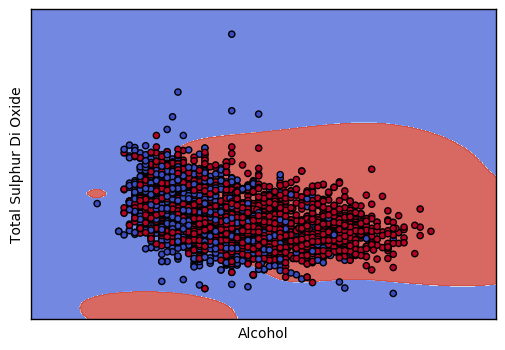

In [55]:
h = .02  # step size in the mesh
 
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Alcohol')
plt.ylabel('Total Sulphur Di Oxide')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

**Conclusion:** SVM Didn't do well . 